# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [1]:
# Import libraries

import numpy as np
import pandas as pd

In [2]:
# Read student data

student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [3]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call

n_students = len(student_data.index)
n_features = len(student_data.columns)-1
#n_passed = student_data.groupby('passed').count()['school'].loc['yes']
#n_failed = student_data.groupby('passed').count()['school'].loc['no']
n_passed = len(student_data[student_data.passed == 'yes'])
n_passed = len(student_data[student_data.passed == 'no'])
grad_rate = 100.*float(n_passed) / float(n_passed+n_failed)

print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 30
Graduation rate of the class: 67.09%


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [5]:
# Extract feature (X) and target (y) columns

feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print "Target column: {}".format(target_col)

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print "\nFeature values:-"
print X_all.head()  # print the first 5 rows

print type(X_all), type(y_all)

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed

Feature values:-
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [6]:
# Preprocess feature columns

def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))
print y_all.head()
X_all.head()

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
3,1,0,1,0,15,0,1,1,0,0,...,1,1,1,3,2,2,1,1,5,2
4,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,4


### Preprocessing data

* Change the output column from 'passed' to 'intervene' so that our positive label is aligned with the results we are searching for (students which will likely fail and thus require intervention) and our F1 score is meaningful
* Preprocess all the data, not just features, so our output column is also converted to numerical
* Remove redundant data columns
  * We note that preprocessing the non-numeric (categorical) data columns into bianry data columns has resulted in a number of redundant data columns which are entirely dependent on other columns
  * This means that 9 of the 48 features can be deleted without any loss of data
  * For the non-numeric binary columns we can remove any one of the two binary columns created
  * For the multiclass columns, we remove the binary column which is least discriminating in the output
* Now we are ready to, separate features and labels

### 3.1 Choosing the positive labelled output

In [7]:
# Change the output column from 'passed' to 'intervene' so that our positive label is aligned with the results we
# are searching for (students which will likely fail and thus require intervention) and our F1 score is meaningful

for i in xrange(0,n_students):
    if student_data['passed'].iloc[i] == 'yes':  student_data['passed'].iloc[i]='no'
    else:                                        student_data['passed'].iloc[i]='yes'
student_data.rename(columns = {'passed':'intervene'}, inplace=True)

# Preprocess all the data, not just features, so our output column is also converted to numerical
student_data = preprocess_features(student_data)

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### 3.2 Removing redundant data columns

In [8]:
# Remove redundant data columns:
# 1. For the non-numeric binary columns we can remove any one of the two binary columns created

del student_data['school_MS']
del student_data['sex_M']
del student_data['address_R']
del student_data['famsize_GT3']
del student_data['Pstatus_A']

# Remove redundant data columns:
# 2. For the multiclass columns, we remove the binary column which is least discriminating in the output

grouped_data = student_data.groupby('intervene')
grouped_data_mean = grouped_data.mean()

Mjob_columns = ['Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Mjob_other']
Fjob_columns = ['Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'Fjob_other']
reason_columns = ['reason_course', 'reason_home', 'reason_reputation', 'reason_other']
guardian_columns = ['guardian_father', 'guardian_mother', 'guardian_other']

grouped_data_mean[Mjob_columns].diff().abs()

,Mjob_at_home,Mjob_health,Mjob_services,Mjob_teacher,Mjob_other
intervene,,,,,
0,NaN,NaN,NaN,NaN,NaN
1,0.029608,0.048041,0.056168,0.001016,0.075617


In [9]:
grouped_data_mean[Fjob_columns].diff().abs()

,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,Fjob_other
intervene,,,,,
0,NaN,NaN,NaN,NaN,NaN
1,0.016255,0.000871,0.039768,0.029173,0.027721


In [10]:
grouped_data_mean[reason_columns].diff().abs()

,reason_course,reason_home,reason_reputation,reason_other
intervene,,,,
0,NaN,NaN,NaN,NaN
1,0.09492,0.001451,0.063716,0.032656


In [11]:
grouped_data_mean[guardian_columns].diff().abs()

,guardian_father,guardian_mother,guardian_other
intervene,,,
0,NaN,NaN,NaN
1,0.052975,0.009724,0.0627


In [12]:
del student_data['Mjob_teacher']
del student_data['Fjob_health']
del student_data['reason_home']
del student_data['guardian_mother']

In [13]:
# Extract feature (X) and target (y) columns

feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label

print "Processed feature columns ({}):-\n{}".format(len(feature_cols), list(feature_cols))
print "Target column: {}".format(target_col)

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels

print y_all.head()
X_all.head()

Processed feature columns (39):-
['school_GP', 'sex_F', 'age', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Fjob_at_home', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: intervene
0    1
1    1
2    0
3    0
4    0
Name: intervene, dtype: int64


,school_GP,sex_F,age,address_U,famsize_LE3,Pstatus_T,Medu,Fedu,Mjob_at_home,Mjob_health,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,1,18,1,0,0,4,4,1,0,...,1,0,0,4,3,4,1,1,3,6
1,1,1,17,1,0,1,1,1,1,0,...,1,1,0,5,3,3,1,1,3,4
2,1,1,15,1,1,1,1,1,1,0,...,1,1,0,4,3,2,2,3,3,10
3,1,1,15,1,0,1,4,2,0,1,...,1,1,1,3,2,2,1,1,5,2
4,1,1,16,1,0,1,3,3,0,0,...,1,0,0,4,3,2,1,2,5,4


### 3.3 Splitting data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [14]:
# First, decide how many training vs test samples you want

num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

test_frac = float(num_test)/float(num_all)

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset

from sklearn import cross_validation

sss = cross_validation.StratifiedShuffleSplit(y_all, n_iter=1, test_size=test_frac, random_state=0)
for train_index, test_index in sss:
    X_train, X_test = X_all.iloc[train_index], X_all.iloc[test_index]
    y_train, y_test = y_all.iloc[train_index], y_all.iloc[test_index]
# print y_train.mean(), y_test.mean()

sss3 = cross_validation.StratifiedShuffleSplit(y_train, n_iter=1, test_size=0.3333, random_state=0)
for train_index, test_index in sss3:
    X_train2, X_train1 = X_all.iloc[train_index], X_all.iloc[test_index]
    y_train2, y_train1 = y_all.iloc[train_index], y_all.iloc[test_index]

print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data

Training set: 300 samples
Test set: 95 samples


## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

In [15]:
results_df = pd.DataFrame(
    data = [[0] * 3] * 10,
    index=['Training time', 'Prediction time',
           'F1 score (training)', 'F1 score (test)',
           'Precision (training)', 'Precision (test)',
           'Recall (training)', 'Recall (test)',
           'Accuracy (training)', 'Accuracy (test)'],
    columns=[100, 200, 300])
# results_df

In [16]:
### Train a model
import time

def train_classifier(clf, X_train, y_train):
    # print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    results_df[len(y_train)].loc['Training time'] = end - start
    # print "Done!\nTraining time (secs): {:.3f}".format(end - start)
    
### Predict on training set and compute F1 score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def predict_labels(clf, features, target):
    # print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    # print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    return [f1_score(target.values, y_pred),#, pos_label='yes')
            accuracy_score(target.values, y_pred),
            precision_score(target.values, y_pred),
            recall_score(target.values, y_pred),
            end-start]

### Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    # print "------------------------------------------"
    # print "Training set size: {}".format(len(X_train))
    # print ""
    train_classifier(clf, X_train, y_train)
    # print ""
    metrics = predict_labels(clf, X_train, y_train)
    results_df[len(y_train)].loc['F1 score (training)'] = metrics[0]
    results_df[len(y_train)].loc['Accuracy (training)'] = metrics[1]
    results_df[len(y_train)].loc['Precision (training)'] = metrics[2]
    results_df[len(y_train)].loc['Recall (training)'] = metrics[3]
    # print "F1 score for training set: {}".format(metrics[0])
    # print ""
    metrics = predict_labels(clf, X_test, y_test)
    results_df[len(y_train)].loc['F1 score (test)'] = metrics[0]
    results_df[len(y_train)].loc['Accuracy (test)'] = metrics[1]
    results_df[len(y_train)].loc['Precision (test)'] = metrics[2]
    results_df[len(y_train)].loc['Recall (test)'] = metrics[3]
    results_df[len(y_train)].loc['Prediction time'] = metrics[4]
    # print "F1 score for test set: {}".format(metrics[0])

### 4.2 Support Vector Machine
#### 4.2.1 SVC(kernel=Linear)

In [17]:
# TODO: Choose a model, import it and instantiate an object
from sklearn.svm import SVC
clf_svm = SVC(kernel="linear")

train_predict(clf_svm, X_train, y_train, X_test, y_test)
print ""
print clf_svm  # you can inspect the learned model by printing it

### Train and predict using different training set sizes

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

train_predict(clf_svm, X_train2, y_train2, X_test, y_test)
train_predict(clf_svm, X_train1, y_train1, X_test, y_test)
results_df


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


,100,200,300
Training time,0.013714,0.016671,0.043696
Prediction time,0.000524,0.000685,0.001415
F1 score (training),0.735294,0.654206,0.533333
F1 score (test),0.526316,0.677419,0.434783
Precision (training),0.833333,0.760870,0.784314
Precision (test),0.576923,0.677419,0.666667
Recall (training),0.657895,0.573770,0.404040
Recall (test),0.483871,0.677419,0.322581
Accuracy (training),0.820000,0.815000,0.766667
Accuracy (test),0.715789,0.789474,0.726316


#### 4.2.2 LinearSVC()

In [18]:
### Train a model
    
# TODO: Choose a model, import it and instantiate an object
from sklearn.svm import LinearSVC
clf_svc = LinearSVC(dual=False)

### Train and predict using different training set sizes

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

train_predict(clf_svc, X_train, y_train, X_test, y_test)
print ""
print clf_svc  # you can inspect the learned model by printing it
train_predict(clf_svc, X_train2, y_train2, X_test, y_test)
train_predict(clf_svc, X_train1, y_train1, X_test, y_test)
results_df


LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


,100,200,300
Training time,0.001484,0.002290,0.029364
Prediction time,0.000605,0.000251,0.000620
F1 score (training),0.764706,0.636364,0.578616
F1 score (test),0.516129,0.657143,0.470588
Precision (training),0.866667,0.714286,0.766667
Precision (test),0.516129,0.589744,0.600000
Recall (training),0.684211,0.573770,0.464646
Recall (test),0.516129,0.741935,0.387097
Accuracy (training),0.840000,0.800000,0.776667
Accuracy (test),0.684211,0.747368,0.715789


In [19]:
# TODO: Train and predict using two other models

### 4.3 K Nearest Neighbours

#### 4.3.1 K NeighborsClassifier(n_neighbors=3)

In [20]:
### Train a model
    
# TODO: Choose a model, import it and instantiate an object
from sklearn.neighbors import KNeighborsClassifier
clf_3nn = KNeighborsClassifier(n_neighbors=3)

### Train and predict using different training set sizes

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

train_predict(clf_3nn, X_train, y_train, X_test, y_test)
print ""
print clf_3nn  # you can inspect the learned model by printing it
train_predict(clf_3nn, X_train2, y_train2, X_test, y_test)
train_predict(clf_3nn, X_train1, y_train1, X_test, y_test)
results_df


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


,100,200,300
Training time,0.000809,0.001170,0.002000
Prediction time,0.002049,0.003481,0.003117
F1 score (training),0.777778,0.591837,0.708571
F1 score (test),0.539683,0.461538,0.425532
Precision (training),0.823529,0.783784,0.815789
Precision (test),0.531250,0.571429,0.625000
Recall (training),0.736842,0.475410,0.626263
Recall (test),0.548387,0.387097,0.322581
Accuracy (training),0.840000,0.800000,0.830000
Accuracy (test),0.694737,0.705263,0.715789


#### 4.3.2 K NeighborsClassifier(n_neighbors=5)

In [21]:
### Train a model
    
# TODO: Choose a model, import it and instantiate an object
from sklearn.neighbors import KNeighborsClassifier
clf_5nn = KNeighborsClassifier(n_neighbors=5)

### Train and predict using different training set sizes

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

train_predict(clf_5nn, X_train, y_train, X_test, y_test)
print ""
print clf_5nn  # you can inspect the learned model by printing it
train_predict(clf_5nn, X_train2, y_train2, X_test, y_test)
train_predict(clf_5nn, X_train1, y_train1, X_test, y_test)
results_df


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


,100,200,300
Training time,0.000849,0.001206,0.001319
Prediction time,0.001249,0.003184,0.003232
F1 score (training),0.542373,0.590476,0.604938
F1 score (test),0.400000,0.535714,0.489796
Precision (training),0.761905,0.704545,0.777778
Precision (test),0.526316,0.600000,0.666667
Recall (training),0.421053,0.508197,0.494949
Recall (test),0.322581,0.483871,0.387097
Accuracy (training),0.730000,0.785000,0.786667
Accuracy (test),0.684211,0.726316,0.736842


#### 4.3.3 K NeighborsClassifier(n_neighbors=7)

In [22]:
### Train a model
    
# TODO: Choose a model, import it and instantiate an object
from sklearn.neighbors import KNeighborsClassifier
clf_7nn = KNeighborsClassifier(n_neighbors=7)

### Train and predict using different training set sizes

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

train_predict(clf_7nn, X_train, y_train, X_test, y_test)
print ""
print clf_7nn  # you can inspect the learned model by printing it
train_predict(clf_7nn, X_train2, y_train2, X_test, y_test)
train_predict(clf_7nn, X_train1, y_train1, X_test, y_test)
results_df


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')


,100,200,300
Training time,0.000541,0.002479,0.001414
Prediction time,0.002489,0.001670,0.002462
F1 score (training),0.508475,0.540000,0.558442
F1 score (test),0.415094,0.470588,0.509804
Precision (training),0.714286,0.692308,0.781818
Precision (test),0.500000,0.600000,0.650000
Recall (training),0.394737,0.442623,0.434343
Recall (test),0.354839,0.387097,0.419355
Accuracy (training),0.710000,0.770000,0.773333
Accuracy (test),0.673684,0.715789,0.736842


### 4.4 Bernoulli Naive Bayes

#### 4.4.1 Converting all input features to binary

* At this point most (two thirds) of our data is binary - we have 39 feature columns, 13 columns are non-binary numeric data, of which 11 are categorical ordinal and two are numerical integers, age (15-22) and absences (0-93)
* We convert each numeric column into one binary data column by looking at the distributions to decide the threshold which most discrimiates between students who pass and those who fail

In [23]:
print "Processed feature columns ({}):-\n{}".format(len(student_data.columns), list(student_data.columns))

Processed feature columns (40):-
['school_GP', 'sex_F', 'age', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Fjob_at_home', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'intervene']


In [24]:
binary_columns = ['school_GP', 'sex_F', 'address_U', 'famsize_LE3', 'Pstatus_T',
                  'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_other',
                  'Fjob_at_home', 'Fjob_services', 'Fjob_teacher', 'Fjob_other',
                  'reason_course', 'reason_reputation', 'reason_other',
                  'guardian_father', 'guardian_other',
                  'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
binary_columns_A = ['school_GP', 'sex_F', 'address_U', 'famsize_LE3', 'Pstatus_T',
                    'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_other',
                    'Fjob_at_home', 'Fjob_services', 'Fjob_teacher', 'Fjob_other']
binary_columns_B = ['reason_course', 'reason_reputation', 'reason_other',
                    'guardian_father', 'guardian_other',
                    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                   'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
grouped_data_mean[binary_columns_A]

,school_GP,sex_F,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_services,Mjob_other,Fjob_at_home,Fjob_services,Fjob_teacher,Fjob_other
intervene,,,,,,,,,,,,,
0,0.890566,0.501887,0.792453,0.301887,0.886792,0.139623,0.101887,0.279245,0.332075,0.045283,0.267925,0.083019,0.558491
1,0.869231,0.576923,0.746154,0.261538,0.915385,0.169231,0.053846,0.223077,0.407692,0.061538,0.307692,0.053846,0.530769


In [25]:
grouped_data_mean[binary_columns_B]

,reason_course,reason_reputation,reason_other,guardian_father,guardian_other,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
intervene,,,,,,,,,,,,,
0,0.335849,0.286792,0.101887,0.245283,0.060377,0.105660,0.592453,0.490566,0.513208,0.792453,0.973585,0.849057,0.301887
1,0.430769,0.223077,0.069231,0.192308,0.123077,0.176923,0.653846,0.392308,0.500000,0.800000,0.900000,0.800000,0.400000


In [26]:
grouped_data_mean[numeric_columns]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
intervene,,,,,,,,,,,,,
0,16.535849,2.837736,2.603774,1.426415,2.079245,0.158491,3.973585,3.222642,2.966038,1.445283,2.264151,3.490566,5.192453
1,17.023077,2.569231,2.353846,1.492308,1.946154,0.692308,3.884615,3.261538,3.400000,1.553846,2.346154,3.684615,6.761538


In [27]:
grouped_data[numeric_columns].median()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
intervene,,,,,,,,,,,,,
0,16,3,3,1,2,0,4,3,3,1,2,4,4
1,17,3,2,1,2,0,4,3,3,1,2,4,4


Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


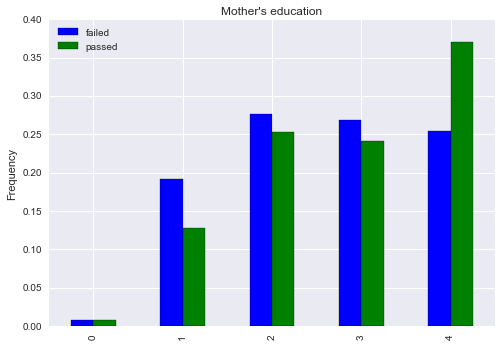

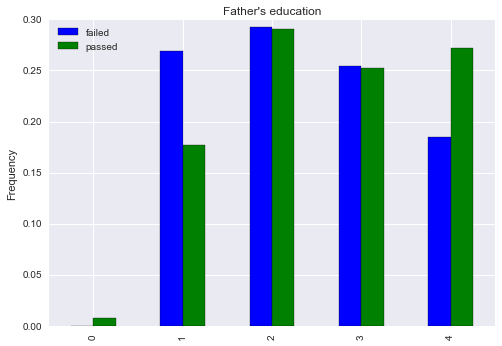

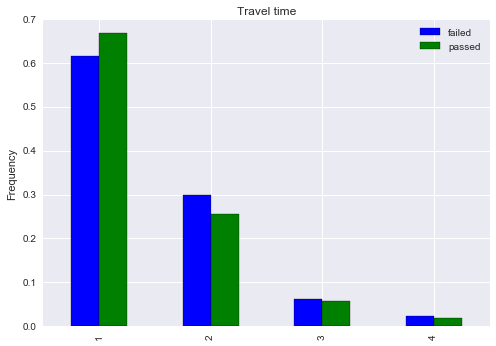

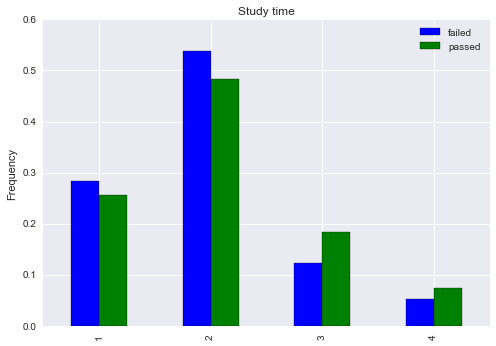

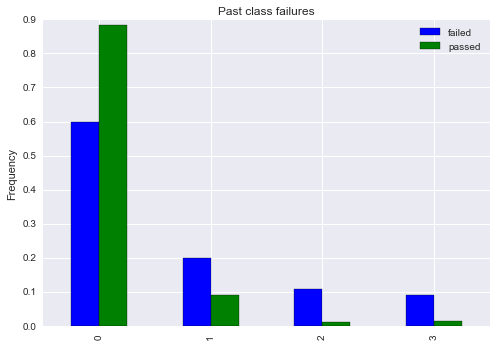

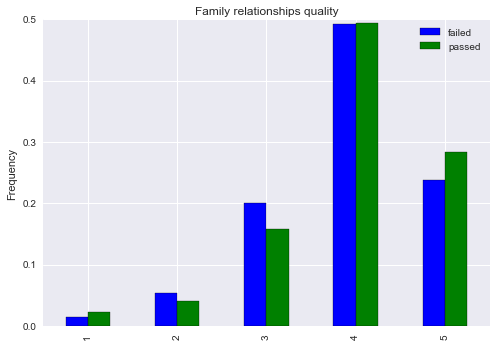

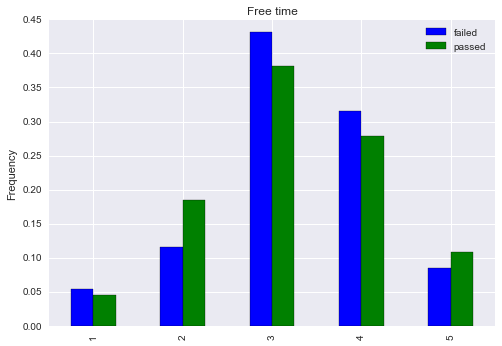

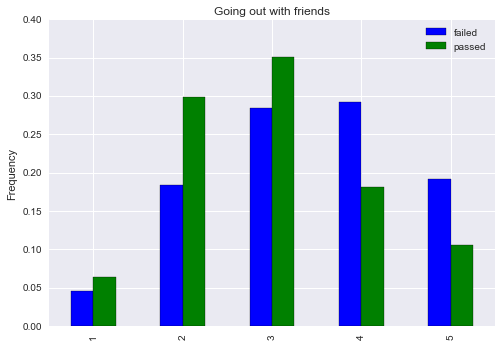

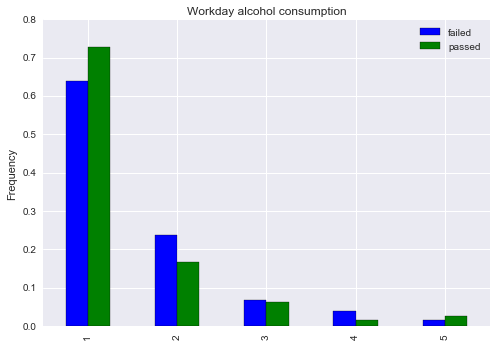

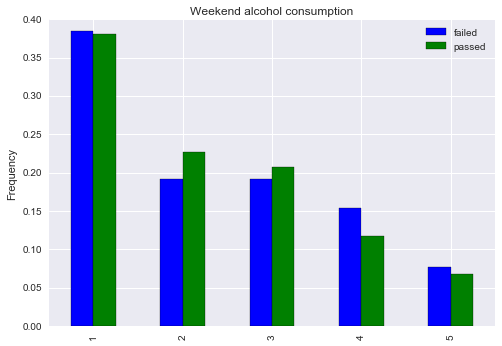

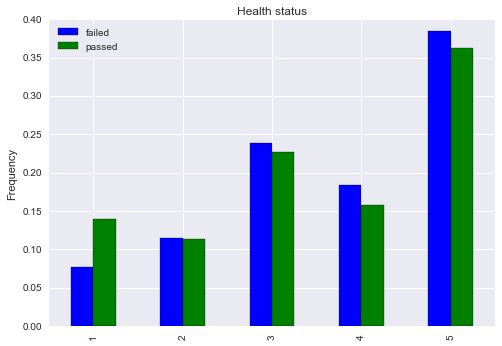

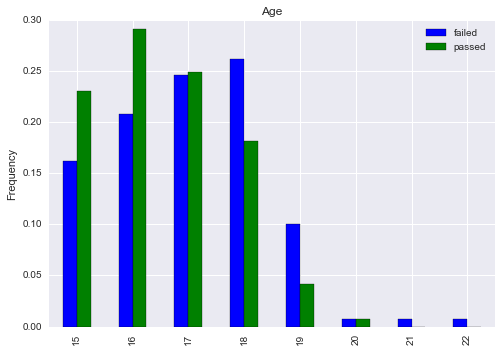

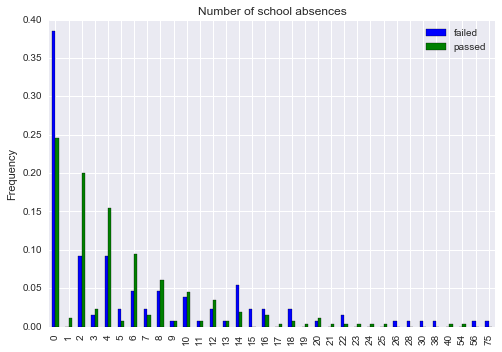

In [28]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

def make_passfail_histogram(column_name, hist_title):
    passed_s = student_data.groupby(['intervene']).get_group(0)[column_name].value_counts()/n_passed
    failed_s = student_data.groupby(['intervene']).get_group(1)[column_name].value_counts()/n_failed
    df = pd.DataFrame({'failed': failed_s, 'passed': passed_s})
    plot = df.sort_index().plot(kind='bar', title=hist_title)
    plot.set_ylabel("Frequency")
    fig = plot.get_figure()
    fig.savefig('Figures/'+column_name+'.pdf')
    
make_passfail_histogram('Medu', "Mother's education")
make_passfail_histogram('Fedu', "Father's education")
make_passfail_histogram('traveltime', "Travel time")
make_passfail_histogram('studytime', "Study time")
make_passfail_histogram('failures', "Past class failures")
make_passfail_histogram('famrel', "Family relationships quality")
make_passfail_histogram('freetime', "Free time")
make_passfail_histogram('goout', "Going out with friends")
make_passfail_histogram('Dalc', "Workday alcohol consumption")
make_passfail_histogram('Walc', "Weekend alcohol consumption")
make_passfail_histogram('health', "Health status")
make_passfail_histogram('age', "Age")
make_passfail_histogram('absences', "Number of school absences")

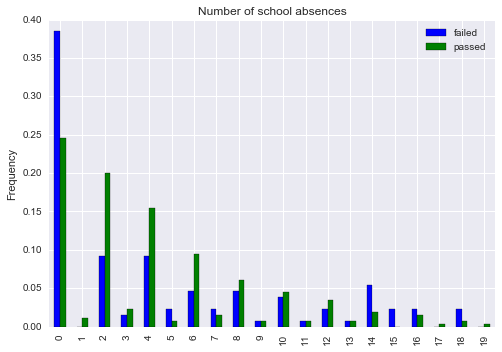

In [29]:
absences_passed = student_data.groupby(['intervene']).get_group(0)['absences'].value_counts()/n_passed
absences_failed = student_data.groupby(['intervene']).get_group(1)['absences'].value_counts()/n_failed
absences_df = pd.DataFrame({'failed': absences_failed, 'passed': absences_passed})
plot = absences_df.iloc[:20].plot(kind='bar', title="Number of school absences")
plot.set_ylabel("Frequency")
fig = plot.get_figure()
fig.savefig('Figures/absences2.pdf')

In [30]:
binary_student_data = student_data.copy()
binary_student_data.rename(columns = {'age':'age_LT18',
                                      'Medu':'Medu_higher',
                                      'Fedu':'Fedu_higher',
                                      'traveltime':'traveltime_LT15mins',
                                      'studytime':'studytime_LT5hrs',
                                      'failures':'failures_zero',
                                      'famrel':'famrel_good',
                                      'freetime':'freetime_high',
                                      'goout':'goout_high',
                                      'Dalc':'Dalc_low',
                                      'Walc':'Walc_high',
                                      'health':'health_good',
                                      'absences':'absences_zero'}, inplace=True)
#binary_student_data.head()

In [31]:
for i in xrange(0,n_students):
    
    if student_data['age'].iloc[i] < 18:  binary_student_data['age_LT18'].iloc[i]=1
    else:                                 binary_student_data['age_LT18'].iloc[i]=0

    if student_data['Medu'].iloc[i] > 3:  binary_student_data['Medu_higher'].iloc[i]=1
    else:                                 binary_student_data['Medu_higher'].iloc[i]=0

    if student_data['Fedu'].iloc[i] > 3:  binary_student_data['Fedu_higher'].iloc[i]=1
    else:                                 binary_student_data['Fedu_higher'].iloc[i]=0

    if student_data['traveltime'].iloc[i] < 2:  binary_student_data['traveltime_LT15mins'].iloc[i]=1
    else:                                       binary_student_data['traveltime_LT15mins'].iloc[i]=0

    if student_data['studytime'].iloc[i] < 3:  binary_student_data['studytime_LT5hrs'].iloc[i]=1
    else:                                      binary_student_data['studytime_LT5hrs'].iloc[i]=0

    if student_data['failures'].iloc[i] < 1:  binary_student_data['failures_zero'].iloc[i]=1
    else:                                     binary_student_data['failures_zero'].iloc[i]=0

    if student_data['famrel'].iloc[i] > 3:  binary_student_data['famrel_good'].iloc[i]=1
    else:                                   binary_student_data['famrel_good'].iloc[i]=0

    if student_data['freetime'].iloc[i] > 2:  binary_student_data['freetime_high'].iloc[i]=1
    else:                                     binary_student_data['freetime_high'].iloc[i]=0

    if student_data['goout'].iloc[i] > 3:  binary_student_data['goout_high'].iloc[i]=1
    else:                                  binary_student_data['goout_high'].iloc[i]=0

    if student_data['Dalc'].iloc[i] < 2:  binary_student_data['Dalc_low'].iloc[i]=1
    else:                                 binary_student_data['Dalc_low'].iloc[i]=0

    if student_data['Walc'].iloc[i] > 3:  binary_student_data['Walc_high'].iloc[i]=1
    else:                                 binary_student_data['Walc_high'].iloc[i]=0

    if student_data['health'].iloc[i] > 2:  binary_student_data['health_good'].iloc[i]=1
    else:                                   binary_student_data['health_good'].iloc[i]=0

    if student_data['absences'].iloc[i] < 1:  binary_student_data['absences_zero'].iloc[i]=1
    else:                                     binary_student_data['absences_zero'].iloc[i]=0

In [32]:
binary_student_data.head()

,school_GP,sex_F,age_LT18,address_U,famsize_LE3,Pstatus_T,Medu_higher,Fedu_higher,Mjob_at_home,Mjob_health,...,internet,romantic,famrel_good,freetime_high,goout_high,Dalc_low,Walc_high,health_good,absences_zero,intervene
0,1,1,0,1,0,0,1,1,1,0,...,0,0,1,1,1,1,0,1,0,1
1,1,1,1,1,0,1,0,0,1,0,...,1,0,1,1,0,1,0,1,0,1
2,1,1,1,1,1,1,0,0,1,0,...,1,0,1,1,0,0,0,1,0,0
3,1,1,1,1,0,1,1,0,0,1,...,1,1,0,0,0,1,0,1,0,0
4,1,1,1,1,0,1,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0


#### 4.4.2 Ordering features from most to least discriminating

In [33]:
ordered_feature_scores = binary_student_data.groupby('intervene').mean().diff().abs().loc[1].sort_values(ascending=False)
ordered_feature_scores

failures_zero          0.283019
goout_high             0.197823
age_LT18               0.154427
absences_zero          0.139332
Medu_higher            0.115965
paid                   0.098258
romantic               0.098113
reason_course          0.094920
Dalc_low               0.089840
Fedu_higher            0.087083
studytime_LT5hrs       0.083454
Mjob_other             0.075617
sex_F                  0.075036
higher                 0.073585
schoolsup              0.071263
reason_reputation      0.063716
guardian_other         0.062700
famsup                 0.061393
freetime_high          0.060958
health_good            0.060522
Mjob_services          0.056168
guardian_father        0.052975
traveltime_LT15mins    0.052540
internet               0.049057
Mjob_health            0.048041
famrel_good            0.046589
address_U              0.046299
Walc_high              0.045864
famsize_LE3            0.040348
Fjob_services          0.039768
reason_other           0.032656
Mjob_at_

In [34]:
ordered_features = list(ordered_feature_scores.index.values)
n_features = len(ordered_features)
print "Total number of features:", n_features
# print ordered_features

X_bin = binary_student_data[ordered_features]  # binary feature values for all students
y_bin = binary_student_data['intervene']  # corresponding targets/labels

# print y_bin.head()
# print X_bin.head()

Total number of features: 39


#### 4.4.3 Split data into traing and test sets for binarised data

In [35]:
for train_index, test_index in sss:
    X_train, X_test = X_bin.iloc[train_index], X_bin.iloc[test_index]
    y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]

for train_index, test_index in sss3:
    X_train2, X_train1 = X_bin.iloc[train_index], X_bin.iloc[test_index]
    y_train2, y_train1 = y_bin.iloc[train_index], y_bin.iloc[test_index]

#### 4.4.4 Train and Predict Bernoulli Naive Bayes

In [36]:
### Train a model

# TODO: Choose a model, import it and instantiate an object
from sklearn.naive_bayes import BernoulliNB
clf_bnb = BernoulliNB()

### Train and predict using different training set sizes

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

train_predict(clf_bnb, X_train, y_train, X_test, y_test)
print ""
print clf_bnb  # you can inspect the learned model by printing it
train_predict(clf_bnb, X_train2, y_train2, X_test, y_test)
train_predict(clf_bnb, X_train1, y_train1, X_test, y_test)
results_df


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


,100,200,300
Training time,0.001669,0.004459,0.004386
Prediction time,0.000366,0.000550,0.000728
F1 score (training),0.608696,0.558559,0.552941
F1 score (test),0.579710,0.615385,0.472727
Precision (training),0.677419,0.620000,0.661972
Precision (test),0.526316,0.588235,0.541667
Recall (training),0.552632,0.508197,0.474747
Recall (test),0.645161,0.645161,0.419355
Accuracy (training),0.730000,0.755000,0.746667
Accuracy (test),0.694737,0.736842,0.694737


### 4.5 Training and Predicting using our Binarised Data

Okay so admitedly, we're worried that the data loss in binarising our data is not insignificant and might have a negative impact, so we go back and look at how it affects our results for the other classifiers by training and predicting them all on the binarised data.

#### 4.5.1 K NeighborsClassifier(n_neighbors=3)

In [37]:
### Train and predict using different training set sizes

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

train_predict(clf_3nn, X_train, y_train, X_test, y_test)
print ""
print clf_3nn  # you can inspect the learned model by printing it
train_predict(clf_3nn, X_train2, y_train2, X_test, y_test)
train_predict(clf_3nn, X_train1, y_train1, X_test, y_test)
results_df


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


,100,200,300
Training time,0.000735,0.000709,0.001413
Prediction time,0.001200,0.003634,0.004578
F1 score (training),0.707692,0.738739,0.652406
F1 score (test),0.524590,0.711864,0.428571
Precision (training),0.851852,0.820000,0.693182
Precision (test),0.533333,0.750000,0.480000
Recall (training),0.605263,0.672131,0.616162
Recall (test),0.516129,0.677419,0.387097
Accuracy (training),0.810000,0.855000,0.783333
Accuracy (test),0.694737,0.821053,0.663158


#### 4.5.2 K NeighborsClassifier(n_neighbors=5)

In [38]:
### Train and predict using different training set sizes

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

train_predict(clf_5nn, X_train, y_train, X_test, y_test)
print ""
print clf_5nn  # you can inspect the learned model by printing it
train_predict(clf_5nn, X_train2, y_train2, X_test, y_test)
train_predict(clf_5nn, X_train1, y_train1, X_test, y_test)
results_df


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


,100,200,300
Training time,0.000553,0.000669,0.001411
Prediction time,0.002466,0.003990,0.003371
F1 score (training),0.586207,0.537634,0.566265
F1 score (test),0.571429,0.520000,0.352941
Precision (training),0.850000,0.781250,0.701493
Precision (test),0.640000,0.684211,0.450000
Recall (training),0.447368,0.409836,0.474747
Recall (test),0.516129,0.419355,0.290323
Accuracy (training),0.760000,0.785000,0.760000
Accuracy (test),0.747368,0.747368,0.652632


#### 4.5.3 K NeighborsClassifier(n_neighbors=7)

In [39]:
### Train and predict using different training set sizes

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

train_predict(clf_7nn, X_train, y_train, X_test, y_test)
print ""
print clf_7nn  # you can inspect the learned model by printing it
train_predict(clf_7nn, X_train2, y_train2, X_test, y_test)
train_predict(clf_7nn, X_train1, y_train1, X_test, y_test)
results_df


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')


,100,200,300
Training time,0.000573,0.001134,0.001661
Prediction time,0.001254,0.002816,0.002866
F1 score (training),0.500000,0.431818,0.528302
F1 score (test),0.384615,0.480000,0.279070
Precision (training),0.777778,0.703704,0.700000
Precision (test),0.476190,0.631579,0.500000
Recall (training),0.368421,0.311475,0.424242
Recall (test),0.322581,0.387097,0.193548
Accuracy (training),0.720000,0.750000,0.750000
Accuracy (test),0.663158,0.726316,0.673684


#### 4.5.4 SVC(kernel=Linear)

In [40]:
### Train and predict using different training set sizes

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

train_predict(clf_svm, X_train, y_train, X_test, y_test)
print ""
print clf_svm  # you can inspect the learned model by printing it
train_predict(clf_svm, X_train2, y_train2, X_test, y_test)
train_predict(clf_svm, X_train1, y_train1, X_test, y_test)
results_df


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


,100,200,300
Training time,0.001489,0.004334,0.009144
Prediction time,0.000649,0.001244,0.001185
F1 score (training),0.716418,0.629630,0.592105
F1 score (test),0.517241,0.557377,0.416667
Precision (training),0.827586,0.723404,0.849057
Precision (test),0.555556,0.566667,0.588235
Recall (training),0.631579,0.557377,0.454545
Recall (test),0.483871,0.548387,0.322581
Accuracy (training),0.810000,0.800000,0.793333
Accuracy (test),0.705263,0.715789,0.705263


#### 4.5.5 LinearSVC()

In [41]:
### Train and predict using different training set sizes

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

train_predict(clf_svc, X_train, y_train, X_test, y_test)
print ""
print clf_svc  # you can inspect the learned model by printing it
train_predict(clf_svc, X_train2, y_train2, X_test, y_test)
train_predict(clf_svc, X_train1, y_train1, X_test, y_test)
results_df


LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


,100,200,300
Training time,0.003097,0.001464,0.001807
Prediction time,0.000406,0.000214,0.000288
F1 score (training),0.714286,0.596154,0.590361
F1 score (test),0.507463,0.571429,0.423077
Precision (training),0.781250,0.720930,0.731343
Precision (test),0.472222,0.562500,0.523810
Recall (training),0.657895,0.508197,0.494949
Recall (test),0.548387,0.580645,0.354839
Accuracy (training),0.800000,0.790000,0.773333
Accuracy (test),0.652632,0.715789,0.684211


### 4.6 Using GridSearchCV to compare our three models

When we ran our other classifiers (SVM and KNN) for the binarised data, we noticed a slight deterioration in the results which might indicate that the information loss in binarising our data is significant and has a negative effect. To analyse further we use GridSearchCV on these other classifiers on the original data and compare the results with GridSearchCV on BNB with the binarised data.

In [42]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

perf_scorer = make_scorer(f1_score)

#### 4.6.1 Support Vector Machine

In [43]:
# TODO: Fine-tune your model and report the best F1 score

parameters = {'C':(5,10,20,40,80),
              'kernel':('linear', 'poly', 'rbf')}

clf = GridSearchCV(clf_svm, parameters, scoring=perf_scorer)
clf.fit(X_all, y_all)
print "Best f1 score: ", clf.best_score_
print "Best param: ", clf.best_params_
clf.grid_scores_

Best f1 score:  0.462270408607
Best param:  {'kernel': 'linear', 'C': 20}


[mean: 0.45808, std: 0.09116, params: {'kernel': 'linear', 'C': 5},
 mean: 0.42560, std: 0.03160, params: {'kernel': 'poly', 'C': 5},
 mean: 0.43293, std: 0.09257, params: {'kernel': 'rbf', 'C': 5},
 mean: 0.45563, std: 0.08846, params: {'kernel': 'linear', 'C': 10},
 mean: 0.43301, std: 0.04362, params: {'kernel': 'poly', 'C': 10},
 mean: 0.41790, std: 0.05791, params: {'kernel': 'rbf', 'C': 10},
 mean: 0.46227, std: 0.09431, params: {'kernel': 'linear', 'C': 20},
 mean: 0.43301, std: 0.04362, params: {'kernel': 'poly', 'C': 20},
 mean: 0.38415, std: 0.06768, params: {'kernel': 'rbf', 'C': 20},
 mean: 0.45976, std: 0.09153, params: {'kernel': 'linear', 'C': 40},
 mean: 0.43301, std: 0.04362, params: {'kernel': 'poly', 'C': 40},
 mean: 0.39332, std: 0.07043, params: {'kernel': 'rbf', 'C': 40},
 mean: 0.45835, std: 0.09122, params: {'kernel': 'linear', 'C': 80},
 mean: 0.43301, std: 0.04362, params: {'kernel': 'poly', 'C': 80},
 mean: 0.40299, std: 0.07719, params: {'kernel': 'rbf', 'C'

#### 4.6.2 K-Nearest Neighbours

In [44]:
# TODO: Fine-tune your model and report the best F1 score

clf_knn = KNeighborsClassifier()
parameters = {'n_neighbors':(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20)}

clf = GridSearchCV(clf_knn, parameters, scoring=perf_scorer)
clf.fit(X_all, y_all)
print "Best f1 score: ", clf.best_score_
print "Best param: ", clf.best_params_
clf.grid_scores_

Best f1 score:  0.381599784541
Best param:  {'n_neighbors': 3}


[mean: 0.36587, std: 0.04152, params: {'n_neighbors': 1},
 mean: 0.28320, std: 0.08569, params: {'n_neighbors': 2},
 mean: 0.38160, std: 0.09354, params: {'n_neighbors': 3},
 mean: 0.25157, std: 0.12192, params: {'n_neighbors': 4},
 mean: 0.36215, std: 0.15445, params: {'n_neighbors': 5},
 mean: 0.28718, std: 0.11737, params: {'n_neighbors': 6},
 mean: 0.34498, std: 0.12147, params: {'n_neighbors': 7},
 mean: 0.28729, std: 0.11789, params: {'n_neighbors': 8},
 mean: 0.35385, std: 0.11217, params: {'n_neighbors': 9},
 mean: 0.29127, std: 0.09774, params: {'n_neighbors': 10},
 mean: 0.33682, std: 0.12437, params: {'n_neighbors': 11},
 mean: 0.25195, std: 0.06771, params: {'n_neighbors': 12},
 mean: 0.29236, std: 0.09304, params: {'n_neighbors': 13},
 mean: 0.24320, std: 0.06864, params: {'n_neighbors': 14},
 mean: 0.29056, std: 0.09759, params: {'n_neighbors': 15},
 mean: 0.20969, std: 0.07564, params: {'n_neighbors': 16},
 mean: 0.25084, std: 0.06605, params: {'n_neighbors': 17},
 mean:

#### 4.6.3 Bernoulli Naive Bayes

In [45]:
# First we use all the features

for train_index, test_index in sss:
    X_train, X_test = X_bin.iloc[train_index], X_bin.iloc[test_index]
    y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]

parameters = {'alpha':np.arange(1, 21), # (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20),
              'fit_prior': (True, False)}

clf = GridSearchCV(clf_bnb, parameters, scoring=perf_scorer)
clf.fit(X_bin, y_bin)

print "params = ", clf.best_params_
print "f1 score = ", clf.best_score_
clf.grid_scores_

params =  {'alpha': 3, 'fit_prior': False}
f1 score =  0.497527877152


[mean: 0.43741, std: 0.10422, params: {'alpha': 1, 'fit_prior': True},
 mean: 0.49332, std: 0.09863, params: {'alpha': 1, 'fit_prior': False},
 mean: 0.43741, std: 0.10422, params: {'alpha': 2, 'fit_prior': True},
 mean: 0.49540, std: 0.10067, params: {'alpha': 2, 'fit_prior': False},
 mean: 0.43750, std: 0.10437, params: {'alpha': 3, 'fit_prior': True},
 mean: 0.49753, std: 0.10281, params: {'alpha': 3, 'fit_prior': False},
 mean: 0.43621, std: 0.10330, params: {'alpha': 4, 'fit_prior': True},
 mean: 0.49490, std: 0.09844, params: {'alpha': 4, 'fit_prior': False},
 mean: 0.42456, std: 0.10042, params: {'alpha': 5, 'fit_prior': True},
 mean: 0.48821, std: 0.10736, params: {'alpha': 5, 'fit_prior': False},
 mean: 0.41742, std: 0.09754, params: {'alpha': 6, 'fit_prior': True},
 mean: 0.48519, std: 0.10427, params: {'alpha': 6, 'fit_prior': False},
 mean: 0.41733, std: 0.09500, params: {'alpha': 7, 'fit_prior': True},
 mean: 0.48303, std: 0.11721, params: {'alpha': 7, 'fit_prior': False},

## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

In [46]:
# TODO: Fine-tune your model and report the best F1 score

In [47]:
# Now we want to also optimise over the number of features k too
# It would be nice if I could figure out how to do this using GridSearchCV and SelectKBest
# Do I need to use pipeline?

n_iterations = 5

bestF1_df = pd.DataFrame(data = [[0] * (n_features+1)] * n_iterations,
                         columns = ['best']+range(1,n_features+1),
                         index = range(1,n_iterations+1))

alpha_df = pd.DataFrame(data = [[0] * (n_features+1)] * n_iterations,
                        columns = ['best']+range(1,n_features+1),
                        index = range(1,n_iterations+1))

fit_prior_df = pd.DataFrame(data = [[0] * (n_features+1)] * n_iterations,
                            columns = ['best']+range(1,n_features+1),
                            index = range(1,n_iterations+1))

for i in xrange(1,n_iterations+1):
    best_f1 = 0
    for k in xrange(1,n_features+1):
        X_bin = binary_student_data[ordered_features[:k]]
        for train_index, test_index in sss:
            X_train, X_test = X_bin.iloc[train_index], X_bin.iloc[test_index]
            y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]    
        clf.fit(X_train, y_train)
        #print "Best f1 score with ", k, " features: ", clf.best_score_, ", parameters = ", clf.best_params_
        if clf.best_score_ > best_f1:
            best_f1 = clf.best_score_
            best_params = clf.best_params_
            best_n_features = k
        bestF1_df[k].loc[i] = clf.best_score_
        alpha_df[k].loc[i] = clf.best_params_['alpha']
        fit_prior_df[k].loc[i] = clf.best_params_['fit_prior']
    bestF1_df['best'].loc[i] = best_f1
    alpha_df['best'].loc[i] = best_params['alpha']
    fit_prior_df['best'].loc[i] = best_params['fit_prior']
    print "Best f1 score:", best_f1, "with", best_n_features, "features, best params = ", best_params

#print "Best f1 score is with ", best_n_features, " features"
#print "params = ", best_params
#print "f1 score = ", best_f1

Best f1 score: 0.561497906725 with 3 features, best params =  {'alpha': 9, 'fit_prior': False}
Best f1 score: 0.561497906725 with 3 features, best params =  {'alpha': 9, 'fit_prior': False}
Best f1 score: 0.561497906725 with 3 features, best params =  {'alpha': 9, 'fit_prior': False}
Best f1 score: 0.561497906725 with 3 features, best params =  {'alpha': 9, 'fit_prior': False}
Best f1 score: 0.561497906725 with 3 features, best params =  {'alpha': 9, 'fit_prior': False}


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
bestF1_df

,best,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1,0.561498,0.526756,0.51076,0.561498,0.5546,0.560889,0.550231,0.538642,0.54984,0.521379,...,0.493817,0.493817,0.494401,0.495341,0.480402,0.480364,0.472153,0.479845,0.487018,0.483698
2,0.561498,0.526756,0.51076,0.561498,0.5546,0.560889,0.550231,0.538642,0.54984,0.521379,...,0.493817,0.493817,0.494401,0.495341,0.480402,0.480364,0.472153,0.479845,0.487018,0.483698
3,0.561498,0.526756,0.51076,0.561498,0.5546,0.560889,0.550231,0.538642,0.54984,0.521379,...,0.493817,0.493817,0.494401,0.495341,0.480402,0.480364,0.472153,0.479845,0.487018,0.483698
4,0.561498,0.526756,0.51076,0.561498,0.5546,0.560889,0.550231,0.538642,0.54984,0.521379,...,0.493817,0.493817,0.494401,0.495341,0.480402,0.480364,0.472153,0.479845,0.487018,0.483698
5,0.561498,0.526756,0.51076,0.561498,0.5546,0.560889,0.550231,0.538642,0.54984,0.521379,...,0.493817,0.493817,0.494401,0.495341,0.480402,0.480364,0.472153,0.479845,0.487018,0.483698


In [49]:
alpha_df

,best,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1,9,1,1,9,1,5,1,16,19,1,...,2,2,3,2,6,2,2,2,2,2
2,9,1,1,9,1,5,1,16,19,1,...,2,2,3,2,6,2,2,2,2,2
3,9,1,1,9,1,5,1,16,19,1,...,2,2,3,2,6,2,2,2,2,2
4,9,1,1,9,1,5,1,16,19,1,...,2,2,3,2,6,2,2,2,2,2
5,9,1,1,9,1,5,1,16,19,1,...,2,2,3,2,6,2,2,2,2,2


In [50]:
fit_prior_df

,best,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [51]:
# Use our best model parameters and train and predict for varying number of features to see how F1 score
# changes with the number of features for our StratifiedShuffleSplit

clf_bnb.alpha = best_params['alpha']
clf_bnb.fit_prior = best_params['fit_prior']

best_f1 = 0
for k in xrange(1,n_features+1):
    X_bin = binary_student_data[ordered_features[:k]]
    for train_index, test_index in sss:
        X_train, X_test = X_bin.iloc[train_index], X_bin.iloc[test_index]
        y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]
    clf_bnb.fit(X_train, y_train)
    y_pred = clf_bnb.predict(X_test)
    print "k = ", k, " f1 score = ", f1_score(y_test, y_pred), " accuracy = ", accuracy_score(y_test, y_pred), " precision = ", precision_score(y_test, y_pred), " recall = ", recall_score(y_test, y_pred)

k =  1  f1 score =  0.375  accuracy =  0.684210526316  precision =  0.529411764706  recall =  0.290322580645
k =  2  f1 score =  0.375  accuracy =  0.684210526316  precision =  0.529411764706  recall =  0.290322580645
k =  3  f1 score =  0.5  accuracy =  0.684210526316  precision =  0.51724137931  recall =  0.483870967742
k =  4  f1 score =  0.5  accuracy =  0.663157894737  precision =  0.484848484848  recall =  0.516129032258
k =  5  f1 score =  0.5  accuracy =  0.663157894737  precision =  0.484848484848  recall =  0.516129032258
k =  6  f1 score =  0.5  accuracy =  0.663157894737  precision =  0.484848484848  recall =  0.516129032258
k =  7  f1 score =  0.548387096774  accuracy =  0.705263157895  precision =  0.548387096774  recall =  0.548387096774
k =  8  f1 score =  0.507936507937  accuracy =  0.673684210526  precision =  0.5  recall =  0.516129032258
k =  9  f1 score =  0.545454545455  accuracy =  0.684210526316  precision =  0.514285714286  recall =  0.58064516129
k =  10  f1 s

In [52]:
# Use our best parameters and the best number of features and calculate our performance metrics

X_bin = binary_student_data[ordered_features[:best_n_features]]
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_bin, y_bin, test_size=test_frac, random_state=0)
# sss = cross_validation.StratifiedShuffleSplit(y_bin, n_iter=1, test_size=test_frac, random_state=0)
for train_index, test_index in sss:
    X_train, X_test = X_bin.iloc[train_index], X_bin.iloc[test_index]
    y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]
    clf_bnb.fit(X_train, y_train)
y_pred = clf_bnb.predict(X_test)
print "k = ", best_n_features
print "f1 score = ", f1_score(y_test, y_pred)
print "accuracy = ", accuracy_score(y_test, y_pred)
print "precision = ", precision_score(y_test, y_pred)
print "recall = ", recall_score(y_test, y_pred)

k =  3
f1 score =  0.5
accuracy =  0.684210526316
precision =  0.51724137931
recall =  0.483870967742
